# Instance hardness measures

Objective: observe how classification difficulty varies within a dataset

Installing the library

In [1]:
!pip install pyhard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 2.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... |anceled
ERROR: Operation cancelled by user
^C
Exception ignored in: <finalize object at 0x7fd144a7a1c0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.12/weakref.py", line 585, in __call__
    def __call__(self, _=None):

KeyboardInterrupt: 


Importing the packages

In [ ]:
import pyhard

In [ ]:
import pandas as pd
from pyhard.measures import ClassificationMeasures
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

Reading the csv files of the datasets with different levels of overlap

In [ ]:
df1 = pd.read_csv('test1.csv')
df2 = pd.read_csv('test2.csv')
df3 = pd.read_csv('test3.csv')
df4 = pd.read_csv('test4.csv')

Ploting the datasets

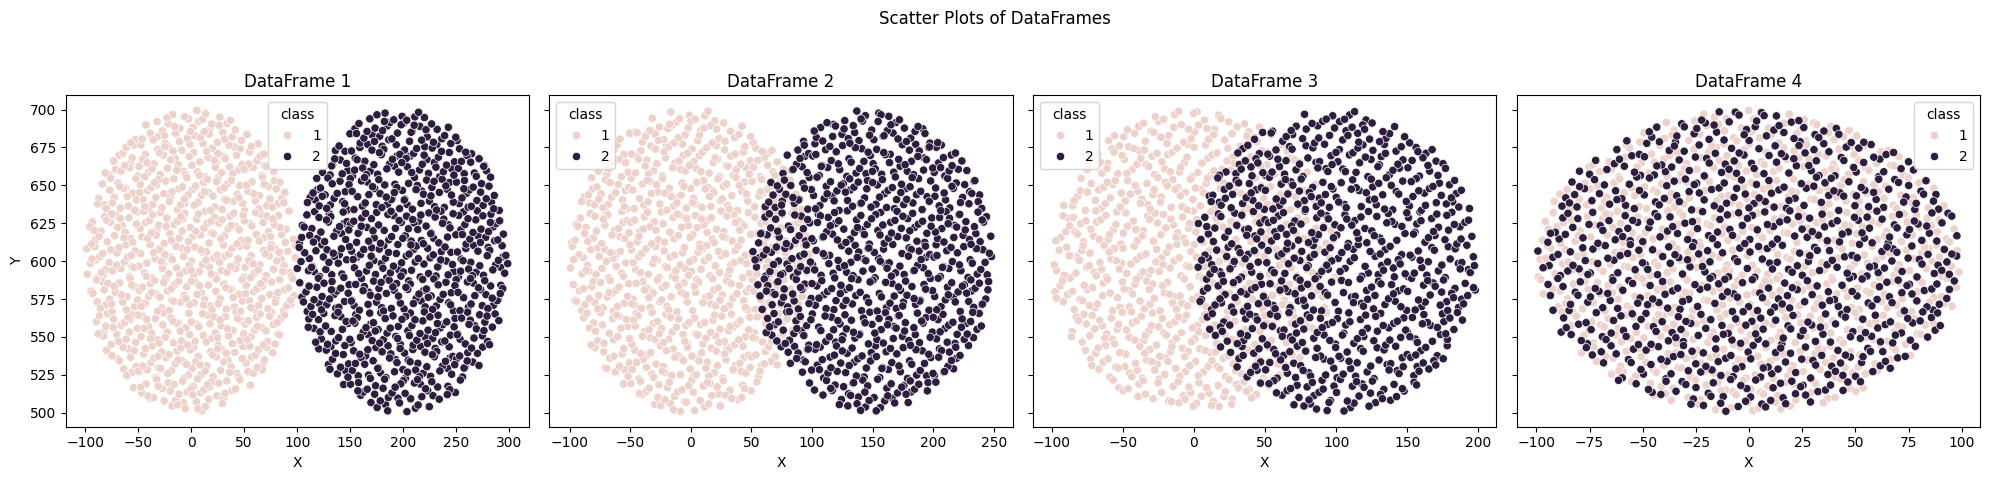

In [ ]:

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
fig.suptitle('Scatter Plots of DataFrames')

sns.scatterplot(ax=axes[0], data=df1, x='X', y='Y', hue='class')
axes[0].set_title('DataFrame 1')

sns.scatterplot(ax=axes[1], data=df2, x='X', y='Y', hue='class')
axes[1].set_title('DataFrame 2')

sns.scatterplot(ax=axes[2], data=df3, x='X', y='Y', hue='class')
axes[2].set_title('DataFrame 3')

sns.scatterplot(ax=axes[3], data=df4, x='X', y='Y', hue='class')
axes[3].set_title('DataFrame 4')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

Extracting the instance hardness measures

In [ ]:
dfs = [df1, df2, df3, df4]

# Create a dictionary to store the results
df_meta_feats_dict = {}

# Compute hardness measures
for i, df in enumerate(dfs):
    m = ClassificationMeasures(df)
    df_meta_feat = m.calculate_all()
    df_meta_feats_dict[f'DataFrame {i+1}'] = df_meta_feat

# Summarizing the results
df_meta_feats_dict['DataFrame 1'].describe()
df_meta_feats_dict['DataFrame 2'].describe()
df_meta_feats_dict['DataFrame 3'].describe()
df_meta_feats_dict['DataFrame 4'].describe()


INFO:pyhard.measures:Calculating measure 'kDN'
INFO:pyhard.measures:Calculating measure 'DS'
INFO:pyhard.measures:Calculating measure 'DCP'
INFO:pyhard.measures:Calculating measure 'TD_P'
INFO:pyhard.measures:Calculating measure 'TD_U'
INFO:pyhard.measures:Calculating measure 'CL'
INFO:pyhard.measures:Calculating measure 'CLD'
INFO:pyhard.measures:Calculating measure 'MV'
INFO:pyhard.measures:Calculating measure 'CB'
INFO:pyhard.measures:Calculating measure 'N1'
INFO:pyhard.measures:Calculating measure 'N2'
INFO:pyhard.measures:Calculating measure 'LSC'
INFO:pyhard.measures:Calculating measure 'LSR'
INFO:pyhard.measures:Calculating measure 'Harmfulness'
INFO:pyhard.measures:Calculating measure 'Usefulness'
INFO:pyhard.measures:Calculating measure 'F1'
INFO:pyhard.measures:Calculating measure 'F2'
INFO:pyhard.measures:Calculating measure 'F3'
INFO:pyhard.measures:Calculating measure 'F4'
INFO:pyhard.measures:Calculating measure 'kDN'
INFO:pyhard.measures:Calculating measure 'DS'
INFO:py

      feature_kDN  feature_DS  feature_DCP  feature_TD_P  feature_TD_U  \
0             0.0    0.000000     0.000000           0.4      0.032258   
1             0.0    0.000000     0.000000           0.4      0.032258   
2             0.1    0.943590     0.000000           0.6      0.048387   
3             0.0    0.000000     0.000000           0.4      0.032258   
4             0.5    0.992308     0.502688           0.6      0.370968   
...           ...         ...          ...           ...           ...   
1495          0.0    0.025641     0.014706           0.4      0.048387   
1496          0.5    1.000000     0.497312           0.6      0.387097   
1497          0.0    0.025641     0.014706           0.4      0.048387   
1498          0.0    0.956410     0.000000           0.8      0.064516   
1499          0.0    0.025641     0.014706           0.4      0.048387   

      feature_CL  feature_CLD  feature_MV  feature_CB  feature_N1  feature_N2  \
0       0.077953     0.077953 

Plotting datasets colored by kDN values

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=4, subplot_titles=(
    "DataFrame 1",
    "DataFrame 2",
    "DataFrame 3",
    "DataFrame 4"
))

for i, df in enumerate(dfs):
    df_name = f'DataFrame {i+1}'
    dcp_values = df_meta_feats_dict[df_name]['feature_kDN']

    # Plot for each DataFrame
    fig.add_trace(go.Scattergl(x=df["X"], y=df["Y"], mode='markers',
                             marker=dict(color=dcp_values,
                                         colorscale='viridis',
                                         cmin=0, cmax=1, # Set color range
                                         showscale=True if i == 3 else False, # Show colorbar only for the last plot
                                         colorbar=dict(title='feature_kDN', x=1.02)), # Position colorbar to the right
                             name=df_name),
                  row=1, col=i+1)

fig.update_layout(title_text="Scatter Plots of DataFrames 1 to 4", showlegend=False)
fig.show()

Plotting datasets according to DCP values

In [ ]:


fig = make_subplots(rows=1, cols=4, subplot_titles=(
    "DataFrame 1",
    "DataFrame 2",
    "DataFrame 3",
    "DataFrame 4"
))

for i, df in enumerate(dfs):
    df_name = f'DataFrame {i+1}'
    dcp_values = df_meta_feats_dict[df_name]['feature_DCP']

    # Plot for each DataFrame
    fig.add_trace(go.Scattergl(x=df["X"], y=df["Y"], mode='markers',
                             marker=dict(color=dcp_values,
                                         colorscale='viridis',
                                         cmin=0, cmax=1, # Set color range
                                         showscale=True if i == 3 else False, # Show colorbar only for the last plot
                                         colorbar=dict(title='feature_DCP', x=1.02)), # Position colorbar to the right
                             name=df_name),
                  row=1, col=i+1)

fig.update_layout(title_text="Scatter Plots of DataFrames 1 to 4", showlegend=False)
fig.show()

Inserting 5% of random noise to dataframe 1

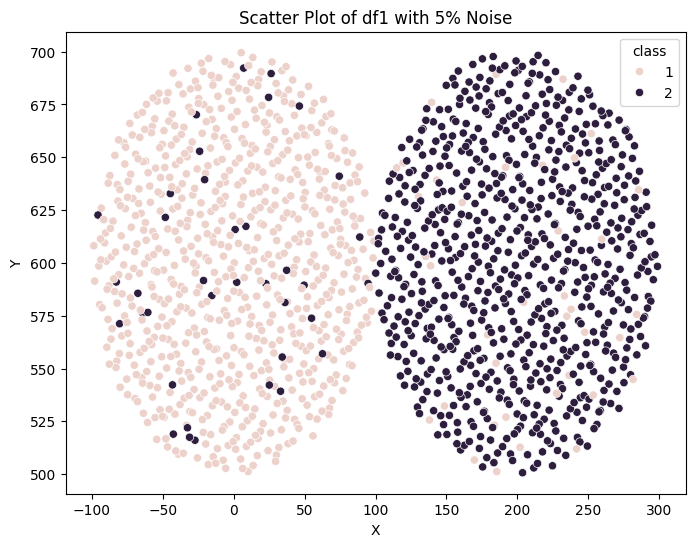

In [ ]:
df1_noise = df1.copy()
noise_rate = 0.05
num_samples = len(df1_noise)
num_noise_samples = int(num_samples * noise_rate)

# Get unique labels
unique_labels = df1_noise['class'].unique()

# Select random indices to add noise
noise_indices = np.random.choice(num_samples, num_noise_samples, replace=False)

# Introduce noise by randomly changing the label to another unique label
for index in noise_indices:
    original_label = df1_noise.loc[index, 'class']
    # Get other unique labels excluding the original one
    other_labels = [label for label in unique_labels if label != original_label]
    if other_labels: # Ensure there are other labels to switch to
        new_label = np.random.choice(other_labels)
        df1_noise.loc[index, 'class'] = new_label

# Ploting new dataset
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1_noise, x='X', y='Y', hue='class')
plt.title('Scatter Plot of df1 with 5% Noise')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Check the distribution of labels after adding noise
#print("\nOriginal DataFrame 1 label counts:")
#print(df1['class'].value_counts())
#print("\nDataFrame 1 with noise label counts:")
#print(df1_noise['class'].value_counts())

In [ ]:
m_noise = ClassificationMeasures(df1_noise)
df1_noise_meta_feat = m_noise.calculate_all()

# Display the first few rows of the computed measures
print(df1_noise_meta_feat.head())

# Summarize the results
print("\nSummary statistics for df1_noise instance hardness measures:")
print(df1_noise_meta_feat.describe())

INFO:pyhard.measures:Calculating measure 'kDN'
INFO:pyhard.measures:Calculating measure 'DS'
INFO:pyhard.measures:Calculating measure 'DCP'
INFO:pyhard.measures:Calculating measure 'TD_P'
INFO:pyhard.measures:Calculating measure 'TD_U'
INFO:pyhard.measures:Calculating measure 'CL'
INFO:pyhard.measures:Calculating measure 'CLD'
INFO:pyhard.measures:Calculating measure 'MV'
INFO:pyhard.measures:Calculating measure 'CB'
INFO:pyhard.measures:Calculating measure 'N1'
INFO:pyhard.measures:Calculating measure 'N2'
INFO:pyhard.measures:Calculating measure 'LSC'
INFO:pyhard.measures:Calculating measure 'LSR'
INFO:pyhard.measures:Calculating measure 'Harmfulness'
INFO:pyhard.measures:Calculating measure 'Usefulness'
INFO:pyhard.measures:Calculating measure 'F1'
INFO:pyhard.measures:Calculating measure 'F2'
INFO:pyhard.measures:Calculating measure 'F3'
INFO:pyhard.measures:Calculating measure 'F4'


   feature_kDN  feature_DS  feature_DCP  feature_TD_P  feature_TD_U  \
0          1.0    0.991071     0.950667           1.0        0.4375   
1          0.0    0.357143     0.049333           1.0        0.3750   
2          0.1    0.678571     0.049333           1.0        0.7500   
3          0.0    0.678571     0.049333           1.0        0.5000   
4          0.0    0.589286     0.049333           1.0        0.5000   

   feature_CL  feature_CLD  feature_MV  feature_CB  feature_N1  feature_N2  \
0    0.957479     0.957479    0.002663    0.667111         1.0    0.844173   
1    0.051364     0.051364    0.000000    0.666222         0.0    0.093884   
2    0.043590     0.043590    0.000000    0.666222         0.0    0.254574   
3    0.142343     0.142343    0.000000    0.666222         0.0    0.140042   
4    0.042792     0.042792    0.000000    0.666222         0.0    0.126013   

   feature_LSC  feature_LSR  feature_Harmfulness  feature_Usefulness  \
0     0.998665     0.990802     

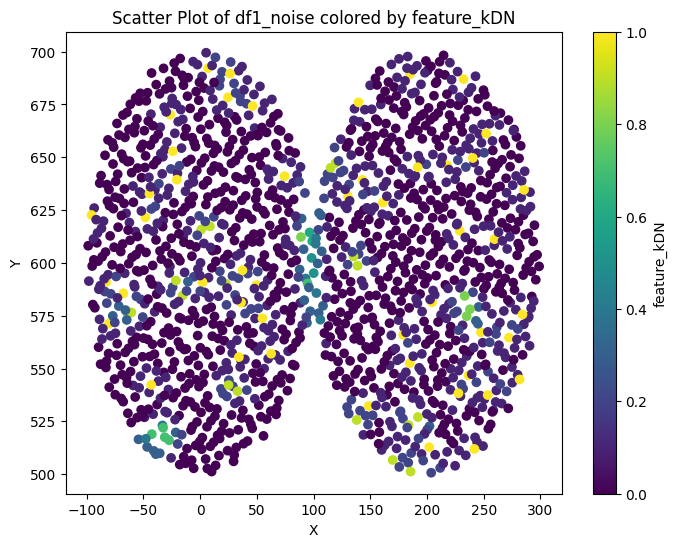

In [ ]:
kdn_values_noise = df1_noise_meta_feat['feature_kDN']

plt.figure(figsize=(8, 6))
scatter = plt.scatter(df1_noise["X"], df1_noise["Y"], c=kdn_values_noise, cmap='viridis')
plt.colorbar(scatter, label='feature_kDN')
plt.title('Scatter Plot of df1_noise colored by feature_kDN')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()